## 讀取資料集與前處理

In [1]:
# 引入所需套件
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [2]:
# 讀取 cifar 資料集
(trainX, trainY), (testX, testY) = cifar10.load_data()
print("train data:",'images:',trainX.shape,
      " labels:",trainY.shape) 
print("test  data:",'images:',testX.shape ,
      " labels:",testY.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [3]:
# 將 data 的範圍變為 [0, 1] 間
x_img_train_normalize = trainX.astype('float32') / 255.0
x_img_test_normalize = testX.astype('float32') / 255.0

In [4]:
# 將 label 轉成 one-hot 格式
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(trainY)
y_label_test_OneHot = np_utils.to_categorical(testY)

## 第一題

In [ ]:
#建立模型: MPL(Multilayer perceptron, 多層感知器) 神經網路，一個只有三層全連結層，沒有卷積層的網路模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)), #將輸入層匯入的 32x32 像素的灰階影像平坦化
  tf.keras.layers.Dense(128, activation='relu'), # 全連接層1，使用relu做激勵函數
  tf.keras.layers.Dense(64, activation='relu'), # 全連接層2，使用relu做激勵函數
  tf.keras.layers.Dense(10) #全連接層3，輸出 (十類分類指數)
])

In [ ]:
# compile model (參數設定與範例程式相同)
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [ ]:
# 訓練模型 (參數設定與範例程式相同)
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1)          

Epoch 1/10
313/313 [==============================] - 4s 6ms/step - loss: 9.6793 - accuracy: 0.1355 - val_loss: 9.6209 - val_accuracy: 0.1288
Epoch 2/10
313/313 [==============================] - 2s 5ms/step - loss: 9.6793 - accuracy: 0.1355 - val_loss: 9.6209 - val_accuracy: 0.1288
Epoch 3/10
313/313 [==============================] - 1s 5ms/step - loss: 9.6793 - accuracy: 0.1355 - val_loss: 9.6209 - val_accuracy: 0.1288
Epoch 4/10
313/313 [==============================] - 1s 4ms/step - loss: 9.6793 - accuracy: 0.1355 - val_loss: 9.6209 - val_accuracy: 0.1288
Epoch 5/10
313/313 [==============================] - 2s 5ms/step - loss: 9.6793 - accuracy: 0.1355 - val_loss: 9.6209 - val_accuracy: 0.1288
Epoch 6/10
313/313 [==============================] - 1s 5ms/step - loss: 9.6793 - accuracy: 0.1355 - val_loss: 9.6209 - val_accuracy: 0.1288
Epoch 7/10
313/313 [==============================] - 2s 6ms/step - loss: 9.6793 - accuracy: 0.1355 - val_loss: 9.6209 - val_accuracy: 0.1288
Epoch 

In [ ]:
# 查看模型測試集正確率
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot, verbose=0)
scores[1]

0.13510000705718994

## 第二題

In [11]:
# 自行建立模型架構

model = Sequential()
# 第一層捲積 + 池化層
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 第二層捲積 + 池化層
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 第三層捲積 + 池化層
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# 全連接層
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax')) # 類別數 = 10

In [ ]:
# 印出模型參數資訊
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 8, 8, 64)         

In [ ]:
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [ ]:
# 訓練模型 (batch_size 調整為 32)
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=20, batch_size=32, verbose=2)          

Epoch 1/20
1250/1250 - 19s - loss: 1.8811 - accuracy: 0.2903 - val_loss: 1.5176 - val_accuracy: 0.4473 - 19s/epoch - 15ms/step
Epoch 2/20
1250/1250 - 6s - loss: 1.5080 - accuracy: 0.4622 - val_loss: 1.2723 - val_accuracy: 0.5450 - 6s/epoch - 5ms/step
Epoch 3/20
1250/1250 - 7s - loss: 1.3673 - accuracy: 0.5224 - val_loss: 1.1965 - val_accuracy: 0.5818 - 7s/epoch - 6ms/step
Epoch 4/20
1250/1250 - 6s - loss: 1.2653 - accuracy: 0.5605 - val_loss: 1.0744 - val_accuracy: 0.6173 - 6s/epoch - 5ms/step
Epoch 5/20
1250/1250 - 7s - loss: 1.1975 - accuracy: 0.5864 - val_loss: 1.0232 - val_accuracy: 0.6451 - 7s/epoch - 6ms/step
Epoch 6/20
1250/1250 - 7s - loss: 1.1387 - accuracy: 0.6089 - val_loss: 1.0817 - val_accuracy: 0.6222 - 7s/epoch - 5ms/step
Epoch 7/20
1250/1250 - 6s - loss: 1.0980 - accuracy: 0.6265 - val_loss: 0.9422 - val_accuracy: 0.6706 - 6s/epoch - 5ms/step
Epoch 8/20
1250/1250 - 7s - loss: 1.0572 - accuracy: 0.6434 - val_loss: 0.8855 - val_accuracy: 0.6996 - 7s/epoch - 5ms/step
Epoch

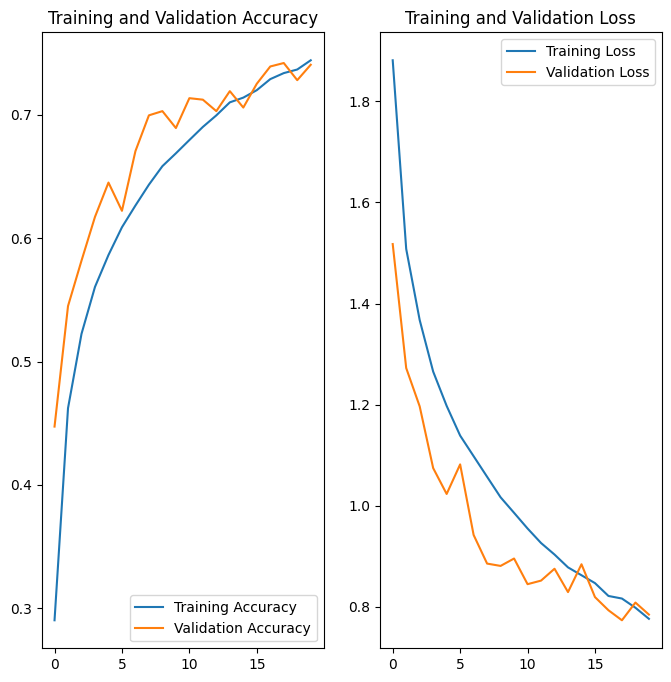

In [ ]:
# 繪製訓練時訓練集與驗證集的正確率、Loss 的曲線

# 讀取正確率數值
acc = train_history.history['accuracy']
val_acc = train_history.history['val_accuracy']
# 讀取 loss 數值
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']

# 宣告 epoch 範圍
epochs_range = range(20)

# 繪圖設定
import matplotlib.pyplot as plt
# 左圖設定(acc)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# 右圖設定(loss)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# 訓練好的模型在訓練集與測試集的準確率、loss
train_loss, train_acc = model.evaluate(x_img_train_normalize, y_label_train_OneHot, verbose=0)
print('train loss:', train_loss)
print('train acc:', train_acc)
print()

test_loss, test_acc = model.evaluate(x_img_test_normalize, y_label_test_OneHot, verbose=0)
print('test loss:', test_loss)
print('test acc:', test_acc)
print()

train loss: 0.5530202388763428
train acc: 0.815060019493103

test loss: 0.808371901512146
test acc: 0.7319999933242798



## 第三題

In [5]:
# Initializing MobileNet as Base Model for Transfer Learning
# input shape 設為 128 * 128 * 3

from keras.applications import MobileNet

base_model = MobileNet(include_top=False, weights='imagenet',
            input_shape=(128,128,3), classes=trainY.shape[1])

# 將前 25 層調整成不訓練
for layer in base_model.layers[:25]: 
  layer.trainable = False

In [6]:
# 將 data 的維度調整成模型的 input shape
x_train = tf.image.resize(x_img_train_normalize, [128, 128])
x_test = tf.image.resize(x_img_test_normalize, [128, 128])

In [7]:
# Adding layers to base model of MobileNet

model = Sequential()

# 前面放 base model
model.add(base_model)

# 後面加上其他層
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [8]:
# compile model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])

In [9]:
# 訓練模型
# epoch 只設為 10，考量到其準確性已足夠，以及訓練耗時
hist = model.fit(x_train, y_label_train_OneHot, batch_size = 64, epochs = 10, 
                 validation_split = 0.2) 


Epoch 1/10
625/625 [==============================] - 515s 818ms/step - loss: 1.2812 - accuracy: 0.5992 - val_loss: 1.2089 - val_accuracy: 0.7045
Epoch 2/10
625/625 [==============================] - 502s 803ms/step - loss: 0.6560 - accuracy: 0.8165 - val_loss: 0.5009 - val_accuracy: 0.8544
Epoch 3/10
625/625 [==============================] - 504s 806ms/step - loss: 0.4971 - accuracy: 0.8638 - val_loss: 0.4939 - val_accuracy: 0.8441
Epoch 4/10
625/625 [==============================] - 496s 793ms/step - loss: 0.4268 - accuracy: 0.8839 - val_loss: 0.4858 - val_accuracy: 0.8636
Epoch 5/10
625/625 [==============================] - 504s 807ms/step - loss: 0.3576 - accuracy: 0.9025 - val_loss: 0.5070 - val_accuracy: 0.8771
Epoch 6/10
625/625 [==============================] - 499s 799ms/step - loss: 0.3168 - accuracy: 0.9130 - val_loss: 0.4135 - val_accuracy: 0.8802
Epoch 7/10
625/625 [==============================] - 499s 799ms/step - loss: 0.2804 - accuracy: 0.9239 - val_loss: 0.4108 -

In [10]:
# 訓練好的模型在訓練集與測試集的準確率、loss
train_loss, train_acc = model.evaluate(x_train, y_label_train_OneHot, verbose=0)
print('train loss:', train_loss)
print('train acc:', train_acc)
print()

test_loss, test_acc = model.evaluate(x_test, y_label_test_OneHot, verbose=0)
print('test loss:', test_loss)
print('test acc:', test_acc)
print()

train loss: 0.19347383081912994
train acc: 0.9509999752044678

test loss: 0.44914501905441284
test acc: 0.8970000147819519



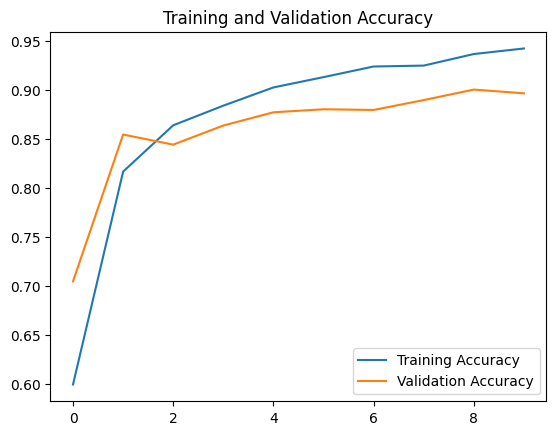

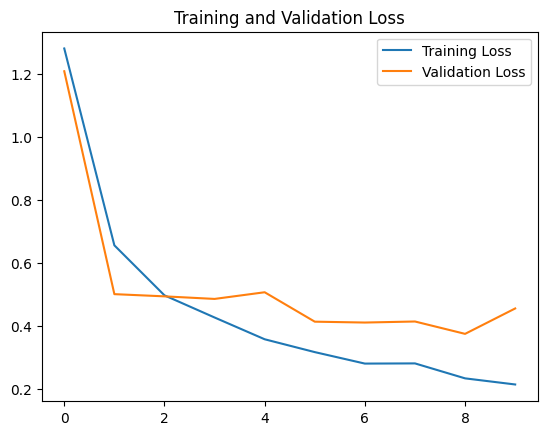

In [12]:
# 繪製訓練時訓練集與驗證集的正確率、Loss 的曲線

# 讀取正確率數值
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
# 讀取 loss 數值
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# 宣告 epoch 範圍
epochs_range = range(10)

# 繪圖設定
import matplotlib.pyplot as plt
# Accuracy 歷史曲線繪圖
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Loss 歷史曲線繪圖
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

313/313 [==============================] - 81s 258ms/step


<Axes: >

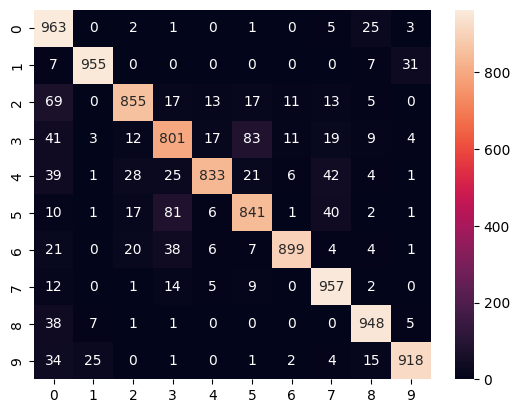

In [20]:
# 繪製混淆矩陣
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test) # 取得預測結果
Y_test = np.array([np.argmax(p) for p in y_label_test_OneHot]) # 轉換回單一數字的 label
Y_pred = np.array([np.argmax(p) for p in y_pred])
cf_matrix  = confusion_matrix(Y_test ,Y_pred) # 算混淆矩陣

# 以 heatmap 形式繪製混淆矩陣
import seaborn as sns
heatmap = sns.heatmap(cf_matrix, 
                      annot=True,
                       fmt="d") # 正整數
figure = heatmap.get_figure()    
heatmap